<a align="center" href="https://hub.ultralytics.com" target="_blank">
<img width="1024", src="https://github.com/ultralytics/assets/raw/main/im/ultralytics-hub.png"></a>

<div align="center">
  <a href="https://github.com/ultralytics/hub/actions/workflows/ci.yaml">
    <img src="https://github.com/ultralytics/hub/actions/workflows/ci.yaml/badge.svg" alt="CI CPU"></a>
  <a href="https://colab.research.google.com/github/ultralytics/hub/blob/master/hub.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>

Welcome to the [Ultralytics](https://ultralytics.com/) HUB notebook!

This notebook allows you to train [YOLOv5](https://github.com/ultralytics/yolov5) and [YOLOv8](https://github.com/ultralytics/ultralytics) 🚀 models using [HUB](https://hub.ultralytics.com/). Please browse the YOLOv8 <a href="https://docs.ultralytics.com">Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/hub/issues/new/choose">GitHub</a> for support, and join our <a href="https://ultralytics.com/discord">Discord</a> community for questions and discussions!
</div>

# Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/requirements.txt) and check software and hardware.

In [10]:
%pip install ultralytics  # install
from ultralytics import YOLO, checks, hub
checks()  # checks

NotImplementedError: ignored

# Start

Login with your [API key](https://hub.ultralytics.com/settings?tab=api+keys), select your YOLO 🚀 model and start training!

In [2]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [11]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="/content/gdrive/MyDrive/Computer Vision/YOLOV8/OCR Text Detection/data.yaml", epochs=20,imgsz=(640,640),batch=25)  # train the model

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/gdrive/MyDrive/Computer Vision/YOLOV8/OCR Text Detection/data.yaml, epochs=20, patience=50, batch=25, imgsz=(640, 640), save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fb3946a9f00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [7]:
from PIL import Image
import cv2

trained_model = YOLO("/content/runs/detect/train/weights/best.pt")
# from ndarray
im2 = cv2.imread("/content/L3_C30_S52-Print_Fail.336.png")
results = trained_model.predict(source=im2)  # save predictions as labels


0: 352x640 9 Texts, 70.4ms
Speed: 2.2ms preprocess, 70.4ms inference, 2.0ms postprocess per image at shape (1, 3, 352, 640)


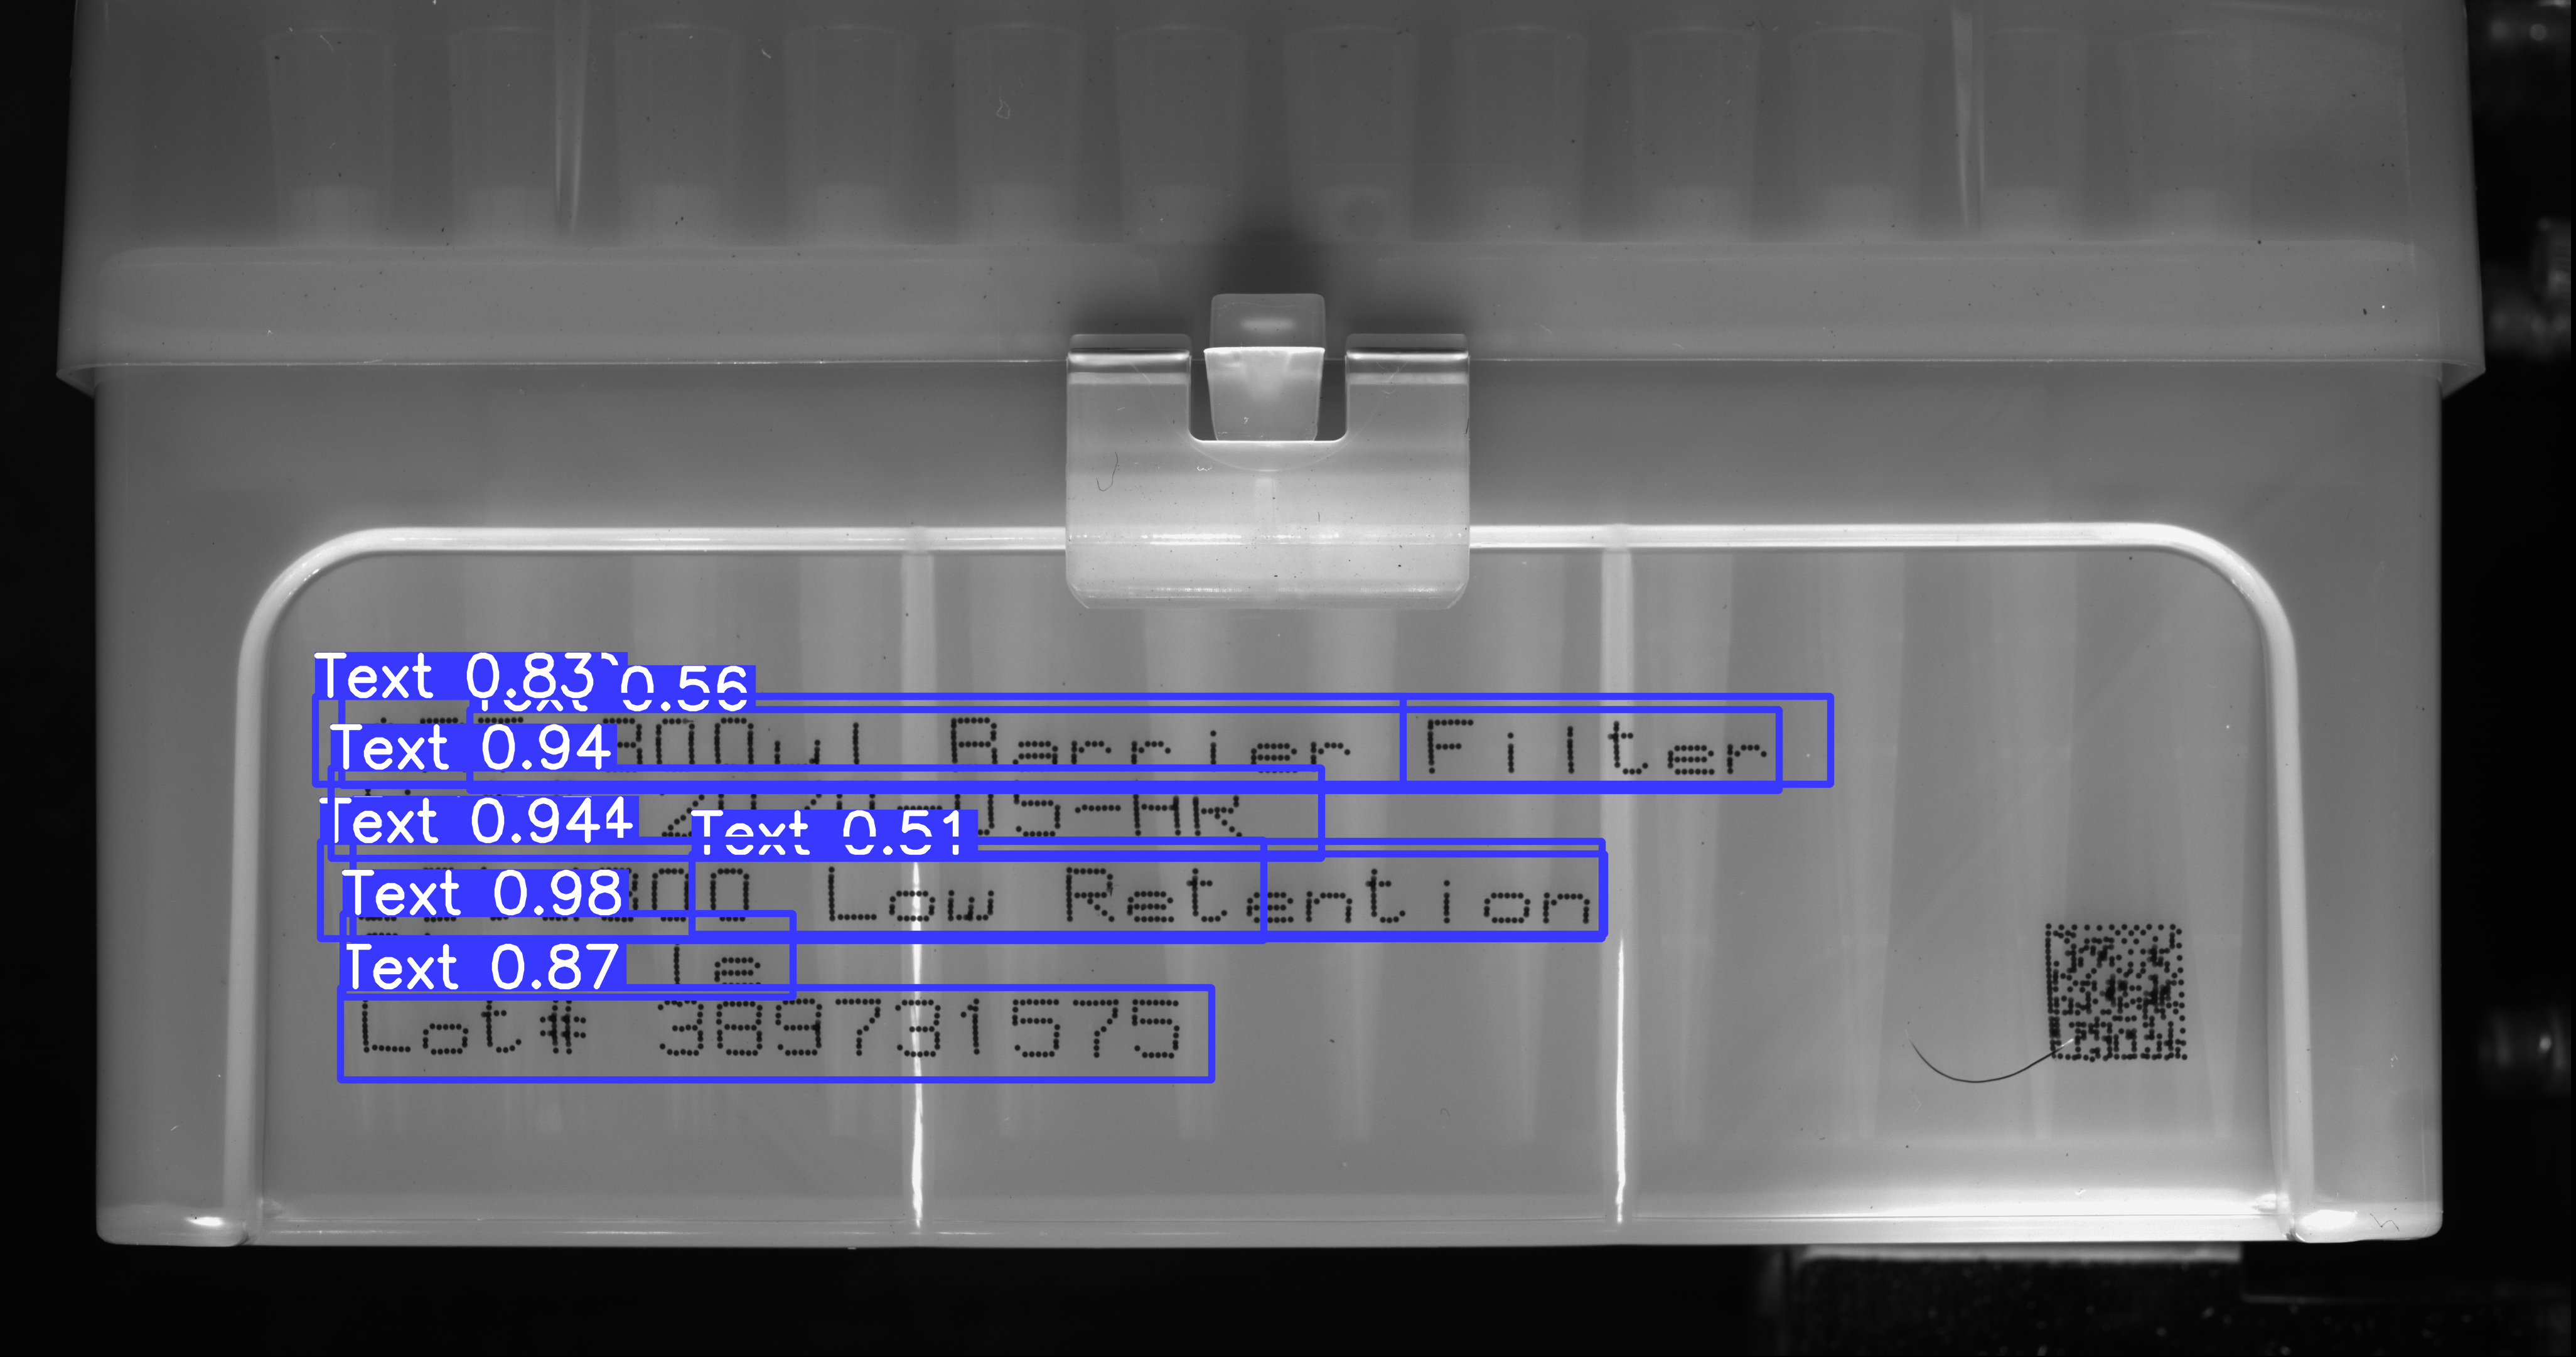

In [9]:
from PIL import Image

for i,r in enumerate(results):
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array,'RGB')  # RGB PIL image
    im.save("output.png")
    display(im)